# Data Preparation for SpotiScry
### Kwame V. Taylor

## Set up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acquire the data

Via the csv file Matt has provided with the sample data for now.

In [2]:
df = pd.read_csv('sample_data.csv')

In [3]:
df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,482830,False,{'isrc': 'USAT21300959'},{'spotify': 'https://open.spotify.com/track/5C...,https://api.spotify.com/v1/tracks/5CQ30WqJwcep...,5CQ30WqJwcep0pYcV4AMNc,False,True,Stairway to Heaven - Remaster,78,https://p.scdn.co/mp3-preview/8226164717312bc4...,4,track,spotify:track:5CQ30WqJwcep0pYcV4AMNc
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,333893,False,{'isrc': 'USAT29900471'},{'spotify': 'https://open.spotify.com/track/0h...,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,0hCB0YR03f6AmQaHbwWDe8,False,True,Whole Lotta Love - 1990 Remaster,77,https://p.scdn.co/mp3-preview/ce11b19a4d2de997...,1,track,spotify:track:0hCB0YR03f6AmQaHbwWDe8
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,146250,False,{'isrc': 'USAT21300934'},{'spotify': 'https://open.spotify.com/track/78...,https://api.spotify.com/v1/tracks/78lgmZwycJ3n...,78lgmZwycJ3nzsdgmPPGNx,False,True,Immigrant Song - Remaster,76,https://p.scdn.co/mp3-preview/8455599677a13017...,1,track,spotify:track:78lgmZwycJ3nzsdgmPPGNx
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,295386,False,{'isrc': 'USAT21300956'},{'spotify': 'https://open.spotify.com/track/3q...,https://api.spotify.com/v1/tracks/3qT4bUD1MaWp...,3qT4bUD1MaWpGrTwcvguhb,False,True,Black Dog - Remaster,72,https://p.scdn.co/mp3-preview/9b76619fd9d563a4...,1,track,spotify:track:3qT4bUD1MaWpGrTwcvguhb
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,263333,False,{'isrc': 'USAT29900477'},{'spotify': 'https://open.spotify.com/track/3M...,https://api.spotify.com/v1/tracks/3MODES4TNtyg...,3MODES4TNtygekLl146Dxd,False,True,Ramble On - 1990 Remaster,70,https://p.scdn.co/mp3-preview/83383aceb01ea27b...,7,track,spotify:track:3MODES4TNtygekLl146Dxd


In [4]:
pd.set_option("display.max_colwidth", 10000)

## Use regex to parse album names from data

In [5]:
df.head()

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/44Ig8dzqOkvkGDzaUof9lK'}, 'href': 'https://api.spotify.com/v1/albums/44Ig8dzqOkvkGDzaUof9lK', 'id': '44Ig8dzqOkvkGDzaUof9lK', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8a11e48c91a982d086afc69', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8a11e48c91a982d086afc69', 'width': 64}], 'name': 'Led Zeppelin IV (Deluxe Edition)', 'release_date': '1971-11-08', 'release_date_precision': 'day', 'total_tracks': 16, 'type': 'album', 'uri': 'spotify:album:44Ig8dzqOkvkGDzaUof9lK'}","[{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}]",1,482830,False,{'isrc': 'USAT21300959'},{'spotify': 'https://open.spotify.com/track/5CQ30WqJwcep0pYcV4AMNc'},https://api.spotify.com/v1/tracks/5CQ30WqJwcep0pYcV4AMNc,5CQ30WqJwcep0pYcV4AMNc,False,True,Stairway to Heaven - Remaster,78,https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=940e516de56949eab620dd24470e2104,4,track,spotify:track:5CQ30WqJwcep0pYcV4AMNc
1,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/70lQYZtypdCALtFVlQAcvx'}, 'href': 'https://api.spotify.com/v1/albums/70lQYZtypdCALtFVlQAcvx', 'id': '70lQYZtypdCALtFVlQAcvx', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02fc4f17340773c6c3579fea0d', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851fc4f17340773c6c3579fea0d', 'width': 64}], 'name': 'Led Zeppelin II (1994 Remaster)', 'release_date': '1969-10-22', 'release_date_precision': 'day', 'total_tracks': 9, 'type': 'album', 'uri': 'spotify:album:70lQYZtypdCALtFVlQAcvx'}","[{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}]",1,333893,False,{'isrc': 'USAT29900471'},{'spotify': 'https://open.spotify.com/track/0hCB0YR03f6AmQaHbwWDe8'},https://api.spotify.com/v1/tracks/0hCB0YR03f6AmQaHbwWDe8,0hCB0YR03f6AmQaHbwWDe8,False,True,Whole Lotta Love - 1990 Remaster,77,https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=940e516de56949eab620dd24470e2104,1,track,spotify:track:0hCB0YR03f6AmQaHbwWDe8
2,"{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/6P5QHz4XtxOmS5EuiGIPut'}, 'href': 'https://api.spotify.com/v1/album

In [6]:
data = {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/44Ig8dzqOkvkGDzaUof9lK'}, 'href': 'https://api.spotify.com/v1/albums/44Ig8dzqOkvkGDzaUof9lK', 'id': '44Ig8dzqOkvkGDzaUof9lK', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8a11e48c91a982d086afc69', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8a11e48c91a982d086afc69', 'width': 64}], 'name': 'Led Zeppelin IV (Deluxe Edition)', 'release_date': '1971-11-08', 'release_date_precision': 'day', 'total_tracks': 16, 'type': 'album', 'uri': 'spotify:album:44Ig8dzqOkvkGDzaUof9lK'}

In [7]:
pd.DataFrame.from_dict(data, orient='index')

,0
album_type,album
artists,"[{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}]"
external_urls,{'spotify': 'https://open.spotify.com/album/44Ig8dzqOkvkGDzaUof9lK'}
href,https://api.spotify.com/v1/albums/44Ig8dzqOkvkGDzaUof9lK
id,44Ig8dzqOkvkGDzaUof9lK
images,"[{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8a11e48c91a982d086afc69', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8a11e48c91a982d086afc69', 'width': 64}]"
name,Led Zeppelin IV (Deluxe Edition)
release_date,1971-11-08
release_date_precision,day
total_tracks,16


This ended up being unnecessary, as we are going to use the playlist features on the API instead.

## Handle null values

In [8]:
df = pd.read_csv('hiphop_sample.csv')

In [9]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,popularity
0,Snoop Dogg,The Best Of Snoop Dogg,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,0.863,0.771,7,-2.770,1,0.1900,0.00000,0.2880,0.812,95.029,234733,4,2005-01-01,52.0
1,The Game,The Documentary,How We Do,6mZcNu9i8uhOYMiEAyEx81,0.862,0.648,4,-7.401,0,0.2510,0.00000,0.0332,0.637,98.012,235533,4,2005,0.0
2,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,0.760,0.595,1,-6.366,1,0.0391,0.00000,0.2410,0.361,131.497,263773,4,2010-09-06,58.0
3,Kanye West,My Beautiful Dark Twisted Fantasy,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,0.582,0.737,1,-3.477,0,0.0356,0.00008,0.1810,0.122,91.914,357653,4,2010-01-01,0.0
4,JAY-Z,The Hits Collection Volume One [International Version (Explicit)],99 Problems,4HsL5A46wa0O2jQ0ngj3H7,0.478,0.955,6,-0.905,0,0.3800,0.00000,0.0599,0.505,87.522,235467,4,2010-11-22,38.0


In [10]:
df.isna().sum()

artist              0
album               0
track_name          0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
release_date        0
popularity          0
dtype: int64

In [11]:
df.artist.value_counts()

The Game                15
Kanye West              11
50 Cent                  6
DMX                      5
Busta Rhymes             5
Nas                      5
Snoop Dogg               4
Rick Ross                4
Diddy - Dirty Money      4
Twista                   3
Ludacris                 3
Various Artists          3
Dr. Dre                  2
Fat Joe                  2
Jeezy                    2
Cam’ron                  2
Eminem                   2
Waka Flocka Flame        1
The Notorious B.I.G.     1
Lil Wayne                1
OutKast                  1
Ice Cube                 1
Maino                    1
Wale                     1
Tyga                     1
Lupe Fiasco              1
Jadakiss                 1
DJ Khaled                1
Cypress Hill             1
JUVENILE                 1
Lloyd Banks              1
Jeremih                  1
J. Cole                  1
JAY-Z                    1
Meek Mill                1
Terror Squad             1
Bone Thugs-N-Harmony     1
J

In [12]:
df.album.value_counts()

The Documentary                                6
God's Son                                      5
Get Rich Or Die Tryin'                         5
Last Train To Paris (Deluxe)                   4
Doctor's Advocate                              4
                                              ..
No Hands (feat. Roscoe Dash & Wale)            1
H.F.M. 2                                       1
Kanye West Presents Good Music Cruel Summer    1
True Story                                     1
All About You                                  1
Name: album, Length: 66, dtype: int64

In [13]:
df.danceability.value_counts()

0.658    3
0.733    2
0.524    2
0.797    2
0.673    1
        ..
0.925    1
0.813    1
0.592    1
0.657    1
0.625    1
Name: danceability, Length: 95, dtype: int64

In [14]:
df.energy.value_counts()

0.764    3
0.647    3
0.737    2
0.845    2
0.630    2
        ..
0.624    1
0.626    1
0.808    1
0.897    1
0.789    1
Name: energy, Length: 86, dtype: int64

In [15]:
df.key.value_counts()

1     24
6     13
8      9
5      9
7      8
4      8
11     7
2      7
10     6
9      5
0      3
3      1
Name: key, dtype: int64

In [16]:
df.loudness.value_counts()

-5.983    1
-3.344    1
-6.405    1
-6.171    1
-3.477    1
         ..
-7.041    1
-6.782    1
-3.917    1
-5.682    1
-7.555    1
Name: loudness, Length: 100, dtype: int64

In [17]:
df['mode'].value_counts()

1    56
0    44
Name: mode, dtype: int64

In [18]:
df['speechiness'].value_counts()

0.219    2
0.349    2
0.115    2
0.136    2
0.233    2
        ..
0.321    1
0.117    1
0.364    1
0.421    1
0.301    1
Name: speechiness, Length: 88, dtype: int64

In [19]:
df['instrumentalness'].value_counts()

0.000000    82
0.000108     1
0.000009     1
0.002510     1
0.004490     1
0.000003     1
0.000001     1
0.000002     1
0.000055     1
0.000139     1
0.056300     1
0.000086     1
0.000090     1
0.000027     1
0.000034     1
0.001460     1
0.000080     1
0.000161     1
0.000004     1
Name: instrumentalness, dtype: int64

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  6.7, 12.4, 18.1, 23.8, 29.5, 35.2, 40.9, 46.6, 52.3, 58. ]),
 <a list of 10 Patch objects>)

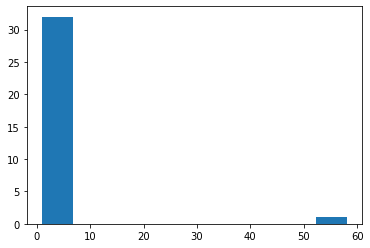

In [20]:
plt.hist(df['popularity'].value_counts())

In [21]:
df.release_date.value_counts()

2010-01-01    11
2006-01-01     8
2004-01-01     6
2005           6
2003-02-06     5
2002-12-13     5
2009-01-01     5
2008-01-01     4
2007-09-11     4
2005-01-01     4
2004-01-27     3
2001-01-01     2
2011-01-01     2
1999-01-01     2
2009           2
2012-01-01     2
2003-01-01     2
2010-11-22     2
2002-05-26     1
2006-12-04     1
2010-09-06     1
2007           1
2000-06-27     1
2011-04-15     1
2008-09-16     1
2009-06-26     1
2009-10-06     1
1999-11-16     1
2008-11-24     1
2010-11-29     1
2006           1
2011-10-28     1
2011-09-23     1
2002-01-01     1
2011-03-04     1
2003-01-13     1
2014-10-10     1
2000-10-31     1
2011-10-19     1
2002-11-26     1
2010-11-18     1
2017-03-31     1
2005-12-09     1
Name: release_date, dtype: int64

## Impute nulls in release date

In [24]:
df['release_date'] = np.where(df['release_date'].str.len()==4, df.release_date.astype(str) + '-01-01', df['release_date'])
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,popularity
0,Snoop Dogg,The Best Of Snoop Dogg,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,0.863,0.771,7,-2.770,1,0.1900,0.00000,0.2880,0.812,95.029,234733,4,2005-01-01,52.0
1,The Game,The Documentary,How We Do,6mZcNu9i8uhOYMiEAyEx81,0.862,0.648,4,-7.401,0,0.2510,0.00000,0.0332,0.637,98.012,235533,4,2005-01-01,0.0
2,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,0.760,0.595,1,-6.366,1,0.0391,0.00000,0.2410,0.361,131.497,263773,4,2010-09-06,58.0
3,Kanye West,My Beautiful Dark Twisted Fantasy,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,0.582,0.737,1,-3.477,0,0.0356,0.00008,0.1810,0.122,91.914,357653,4,2010-01-01,0.0
4,JAY-Z,The Hits Collection Volume One [International Version (Explicit)],99 Problems,4HsL5A46wa0O2jQ0ngj3H7,0.478,0.955,6,-0.905,0,0.3800,0.00000,0.0599,0.505,87.522,235467,4,2010-11-22,38.0


In [26]:
def handle_nulls(df):
    '''
    This function takes in a DataFrame and returns a DataFrame with the nulls handled.
    Release dates that don't have a month or day are assign a day and month of '01-01'.
    '''
    df['release_date'] = np.where(df['release_date'].str.len()==4, df.release_date.astype(str) + '-01-01', df['release_date'])
    return df
